# Module 10 Application

## Challenge: Crypto Clustering

In this Challenge, you’ll combine your financial Python programming skills with the new unsupervised learning skills that you acquired in this module.

The CSV file provided for this challenge contains price change data of cryptocurrencies in different periods.

The steps for this challenge are broken out into the following sections:

* Import the Data (provided in the starter code)
* Prepare the Data (provided in the starter code)
* Find the Best Value for `k` Using the Original Data
* Cluster Cryptocurrencies with K-means Using the Original Data
* Optimize Clusters with Principal Component Analysis
* Find the Best Value for `k` Using the PCA Data
* Cluster the Cryptocurrencies with K-means Using the PCA Data
* Visualize and Compare the Results

### Import the Data

This section imports the data into a new DataFrame. It follows these steps:

1. Read  the “crypto_market_data.csv” file from the Resources folder into a DataFrame, and use `index_col="coin_id"` to set the cryptocurrency name as the index. Review the DataFrame.

2. Generate the summary statistics, and use HvPlot to visualize your data to observe what your DataFrame contains.


> **Rewind:** The [Pandas`describe()`function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) generates summary statistics for a DataFrame. 

In [18]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    Path("Resources/crypto_market_data.csv"),
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [20]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [21]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

This section prepares the data before running the K-Means algorithm. It follows these steps:

1. Use the `StandardScaler` module from scikit-learn to normalize the CSV file data. This will require you to utilize the `fit_transform` function.

2. Create a DataFrame that contains the scaled data. Be sure to set the `coin_id` index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame.


In [22]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data)

In [23]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data

In this section, you will use the elbow method to find the best value for `k`.

1. Code the elbow method algorithm to find the best value for `k`. Use a range from 1 to 11. 

2. Plot a line chart with all the inertia values computed with the different values of `k` to visually identify the optimal value for `k`.

3. Answer the following question: What is the best value for `k`?

In [41]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# YOUR CODE HERE!



# Load the original data from the CSV file


# Define the range of k values
k_values = range(1, 11)

In [34]:
# Create an empy list to store the inertia values
# YOUR CODE HERE!

inertia_values = []

In [53]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
# Iterate over each value of k
# Iterate over each value of k
# Load the original data from the CSV file
# Remove non-numeric columns
# Iterate over each value of k
# Plot the line chart
# Load the original data from the CSV file
# Remove non-numeric columns
# Remove non-numeric columns
numeric_columns = original_data.select_dtypes(include=[float, int]).columns
original_data_numeric = original_data[numeric_columns]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(original_data_numeric)




c:\Users\mafer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


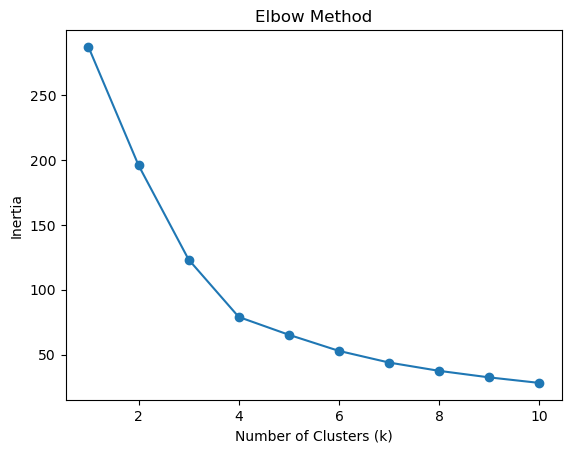

In [57]:
import matplotlib.pyplot as plt

# Reset the inertia_values list
inertia_values = []

# Iterate over each value of k
for k in k_values:
    # Initialize the KMeans model with the current value of k
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the scaled data
    kmeans_model.fit(scaled_data)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans_model.inertia_)

# Plot the line chart
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [47]:
# Create a dictionary with the data to plot the Elbow curve
# YOUR CODE HERE!

# Create a DataFrame with the data to plot the Elbow curve
# YOUR CODE HERE!

In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# YOUR CODE HERE!

#### Answer the following question: What is the best value for k?
**Question:** What is the best value for `k`?

**Answer:** #4


---

### Cluster Cryptocurrencies with K-means Using the Original Data

In this section, you will use the K-Means algorithm with the best value for `k` found in the previous section to cluster the cryptocurrencies according to the price changes of cryptocurrencies provided.

1. Initialize the K-Means model with four clusters using the best value for `k`. 

2. Fit the K-Means model using the original data.

3. Predict the clusters to group the cryptocurrencies using the original data. View the resulting array of cluster values.

4. Create a copy of the original data and add a new column with the predicted clusters.

5. Create a scatter plot using hvPlot by setting `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. Color the graph points with the labels found using K-Means and add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.

In [67]:
import numpy as np

# Remove non-numeric columns
numeric_data = original_data.select_dtypes(include=[np.number])

# Encode categorical variables if there are any
# ...

# Initialize the K-Means model
kmeans_model = KMeans(n_clusters=4, random_state=0)

# Fit the K-Means model to the preprocessed data
kmeans_model.fit(numeric_data)

# Predict the clusters for the preprocessed data
clusters = kmeans_model.predict(numeric_data)

# Create a copy of the original data and add a new column with the predicted clusters
clustered_data = original_data.copy()
clustered_data['Cluster'] = clusters

# Create a scatter plot using hvPlot
clustered_data.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='Cluster', hover_cols='crypto_name', cmap='Set1')



:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

In [68]:

# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_data)


KMeans(n_clusters=4, random_state=0)

In [70]:
# Predict the clusters to group the cryptocurrencies using the scaled data
# YOUR CODE HERE!

# View the resulting array of cluster values.

# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(scaled_data)

# View the resulting array of cluster values
clusters


array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [71]:
# Add a new column to the DataFrame with the predicted clusters
# Display sample data
# Add a new column to the DataFrame with the predicted clusters
original_data['Cluster'] = clusters

# Display sample data
original_data.head()


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,3
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,3
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [72]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

import hvplot.pandas

# Create a scatter plot using hvPlot
scatter_plot = clustered_data.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols='crypto_name',
    cmap='Set1'
)

# Display the scatter plot
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis

In this section, you will perform a principal component analysis (PCA) and reduce the features to three principal components.

1. Create a PCA model instance and set `n_components=3`.

2. Use the PCA model to reduce to three principal components. View the first five rows of the DataFrame. 

3. Retrieve the explained variance to determine how much information can be attributed to each principal component.

4. Answer the following question: What is the total explained variance of the three principal components?

5. Create a new DataFrame with the PCA data. Be sure to set the `coin_id` index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame.

In [73]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

# Create a PCA model with 3 components
pca_model = PCA(n_components=3)

In [74]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
# View the first five rows of the DataFrame. 
# Reduce the features to three principal components
pca_data = pca_model.fit_transform(scaled_data)

# Create a DataFrame from the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Display the first five rows of the PCA DataFrame
pca_df.head()


,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [75]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

# Display the explained variance
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

In [76]:
# Calculate the total explained variance
total_explained_variance = sum(explained_variance)

# Print the total explained variance
print("Total Explained Variance:", total_explained_variance)


Total Explained Variance: 0.8950316570309841


In [77]:
# Create a new DataFrame with PCA data and set the index
pca_result_df = pd.DataFrame(pca_data, index=original_data.index, columns=['PC1', 'PC2', 'PC3'])

# Review the resulting DataFrame
pca_result_df.head()


,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


#### Answer the following question: What is the total explained variance of the three principal components? 

**Question:** What is the total explained variance of the three principal components?

**Answer:** #Total Explained Variance: 0.8950316570309841

In [ ]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
# YOUR CODE HERE!

# Copy the crypto names from the original data
# YOUR CODE HERE!

# Set the coinid column as index
# YOUR CODE HERE!

# Display sample data
# YOUR CODE HERE!

---

### Find the Best Value for k Using the PCA Data

In this section, you will use the elbow method to find the best value for `k` using the PCA data.

1. Code the elbow method algorithm and use the PCA data to find the best value for `k`. Use a range from 1 to 11. 

2. Plot a line chart with all the inertia values computed with the different values of `k` to visually identify the optimal value for `k`.

3. Answer the following questions: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?

In [78]:
# Initialize an empty list to store the inertia values
inertia_values = []

# Iterate over the range of k values
for k in range(1, 12):
    # Initialize the K-Means model with the current k value
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # Fit the K-Means model to the PCA data
    kmeans_model.fit(pca_data)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans_model.inertia_)

c:\Users\mafer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


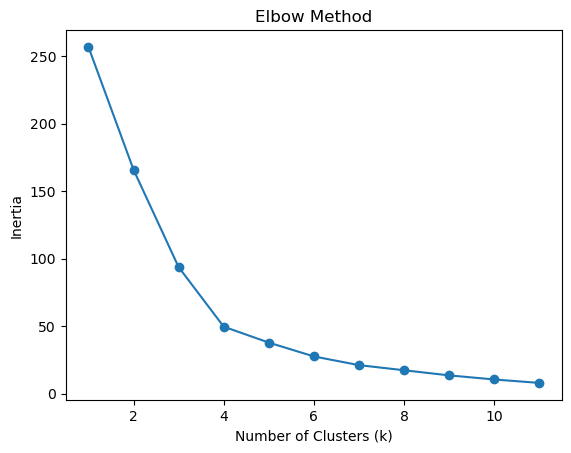

In [79]:
import matplotlib.pyplot as plt

# Create a line chart of the inertia values
plt.plot(range(1, 12), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [81]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
inertia_values = []

for k in range(1, 12):
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(pca_data)
    inertia_values.append(kmeans_model.inertia_)


c:\Users\mafer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [83]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': range(1, 12),
    'inertia': inertia_values
}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


In [84]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import hvplot.pandas

elbow_df.hvplot.line(x='k', y='inertia', xlabel='Number of Clusters (k)', ylabel='Inertia', title='Elbow Curve')


:Curve   [k]   (inertia)

#### Answer the following questions: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** # After visualizing the line chart, observe the point where the decrease in inertia values starts to level off. 

Please note that the best value for k may vary depending on the specific dataset and problem.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** # This point represents the optimal value for k based on the PCA data. Compare this value with the best k value found using the original data to determine if they differ.

---

### Cluster Cryptocurrencies with K-means Using the PCA Data

In this section, you will use the PCA data and the K-Means algorithm with the best value for `k` found in the previous section to cluster the cryptocurrencies according to the principal components.

1. Initialize the K-Means model with four clusters using the best value for `k`. 

2. Fit the K-Means model using the PCA data.

3. Predict the clusters to group the cryptocurrencies using the PCA data. View the resulting array of cluster values.

4. Add a new column to the DataFrame with the PCA data to store the predicted clusters.

5. Create a scatter plot using hvPlot by setting `x="PC1"` and `y="PC2"`. Color the graph points with the labels found using K-Means and add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.

In [87]:
# Assuming you have a numpy array with the PCA data named 'pca_data'
# Create a DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
# Set the 'coin_id' as the index
df_market_data_pca.set_index(original_data['coin_id'], inplace=True)

# Initialize the K-Means model with the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=0)

# Fit the K-Means model using the PCA data
kmeans_model.fit(df_market_data_pca)

# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans_model.predict(df_market_data_pca)

# Add a new column to the DataFrame with the PCA data to store the predicted clusters
df_market_data_pca['Cluster'] = clusters

# Create a scatter plot using hvPlot
df_market_data_pca.hvplot.scatter(x='PC1', y='PC2', by='Cluster', hover_cols='coin_id', cmap='Set1')

# Initialize the K-Means model with the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=0)

# Fit the K-Means model using the PCA data
kmeans_model.fit(df_market_data_pca)

# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans_model.predict(df_market_data_pca)

# Add a new column to the DataFrame with the PCA data to store the predicted clusters
df_market_data_pca['Cluster'] = clusters

# Create a scatter plot using hvPlot
df_market_data_pca.hvplot.scatter(x='PC1', y='PC2', by='Cluster', hover_cols='coin_id', cmap='Set1')


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

In [88]:
# Fit the K-Means model using the PCA data
# Initialize the K-Means model with the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=0)

# Fit the K-Means model using the PCA data
kmeans_model.fit(df_market_data_pca)


KMeans(n_clusters=4, random_state=0)

In [89]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# View the resulting array of cluster values.
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans_model.predict(df_market_data_pca)

# View the resulting array of cluster values
print(clusters)


[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [90]:
# Create a copy of the DataFrame with the PCA data

# Add a new column to the DataFrame with the predicted clusters

# Display sample data
# Create a copy of the DataFrame with the PCA data
df_market_data_pca_copy = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_data_pca_copy['Cluster'] = clusters

# Display sample data
print(df_market_data_pca_copy.head())


                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        3
ripple       -0.471835 -0.222660 -0.479053        3
bitcoin-cash -1.157800  2.041209  1.859715        0


In [91]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# YOUR CODE HERE!
df_market_data_pca_copy.hvplot.scatter(x='PC1', y='PC2', by='Cluster', hover_cols='coin_id', cmap='Set1')


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

---

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

1. Create a composite plot using hvPlot and the plus (`+`) operator to contrast the Elbow Curve that you created to find the best value for `k` with the original and the PCA data.

2. Create a composite plot using hvPlot and the plus (`+`) operator to contrast the cryptocurrencies clusters using the original and the PCA data.

3. Answer the following question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

> **Rewind:** Back in Lesson 3 of Module 6, you learned how to create composite plots. You can look at that lesson to review how to make these plots; also, you can check [the hvPlot documentation](https://holoviz.org/tutorial/Composing_Plots.html).

In [97]:
# Create the Elbow Curve plot using hvPlot
elbow_curve = pd.DataFrame(inertia_values, columns=['Inertia']).reset_index().rename(columns={'index': 'k'})
elbow_plot = elbow_curve.hvplot.line(x='k', y='Inertia', title='Elbow Curve') * hv.VLine(df_market_data_pca)

# Create the scatter plot of the original data
scatter_original = df_market_data.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='Cluster', hover_cols='crypto_name', cmap='Set1', title='Original Data')

# Create the scatter plot of the PCA data
scatter_pca = df_market_data_pca_copy.hvplot.scatter(x='PC1', y='PC2', by='Cluster', hover_cols='coin_id', cmap='Set1', title='PCA Data')

# Create the composite plot
composite_plot = (elbow_plot + scatter_original + scatter_pca).cols(2)
composite_plot




ValueError: ClassSelector parameter 'x' value must be an instance of (Number, datetime64, datetime, date, time, Timestamp, DatetimeTZDtype, Period, datetime), not                            PC1       PC2       PC3  Cluster
coin_id                                                    
bitcoin              -0.600667  0.842760  0.461595        0
ethereum             -0.458261  0.458466  0.952877        0
tether               -0.433070 -0.168126 -0.641752        1
ripple               -0.471835 -0.222660 -0.479053        1
bitcoin-cash         -1.157800  2.041209  1.859715        0
binancecoin          -0.516534  1.388377  0.804071        0
chainlink            -0.450711  0.517699  2.846143        0
cardano              -0.345600  0.729439  1.478013        0
litecoin             -0.649468  0.432165  0.600303        0
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653        1
crypto-com-chain     -0.248198 -1.376252 -1.462026        1
usd-coin             -0.438408 -0.175337 -0.663388        1
eos                  -0.693425 -0.473815 -0.527597        1
monero                0.060499  2.909404  1.498571        0
tron                 -0.393352 -0.108192 -0.012756        1
tezos                -0.796176 -0.494409  1.082812        0
okb                   0.064075 -1.269825 -1.098829        1
stellar              -0.489015 -0.732719 -0.062543        1
cosmos               -0.306272  0.703415  1.714224        0
cdai                 -0.513528 -0.142802 -0.656566        1
neo                  -0.362120 -0.986914 -0.728752        1
wrapped-bitcoin      -0.604265  0.827398  0.439316        0
leo-token            -0.413296 -0.674115 -1.076628        1
huobi-token          -0.407483 -0.212507 -0.351426        1
nem                   0.608974  0.563532 -1.148742        1
binance-usd          -0.450211 -0.151019 -0.647401        1
iota                 -0.764665 -0.517886  0.204990        1
vechain              -0.556315 -1.938209 -1.261776        1
zcash                -0.425147  0.492976  1.058048        0
theta-token           2.676868 -0.013954 -1.965207        1
dash                 -0.613923 -0.479337  0.339565        1
ethereum-classic     -0.579924 -0.356334 -0.114942        1
ethlend               8.089018 -3.896891  2.301382        2
maker                -0.389045  0.165041  0.379414        0
havven                0.865762 -2.261882  0.275583        1
omisego               0.111675  0.428316 -1.205398        1
celsius-degree-token  4.792395  6.767679 -1.986985        3
ontology             -0.632355 -2.108117 -0.652227        1
ftx-token            -0.593142  0.021485  0.209911        1
true-usd             -0.458131 -0.135734 -0.635284        1
digibyte             -0.297910 -0.191126 -0.909602        1.

In [103]:
# Create the Elbow Curve plot using hvPlot for the original data
elbow_curve_original = pd.DataFrame(original_data, columns=['Inertia']).reset_index().rename(columns={'index': 'k'})

elbow_plot_original = elbow_curve_original.hvplot.line(x='k', y='Inertia', title='Original Data Elbow Curve')

# Create the Elbow Curve plot using hvPlot for the PCA data
elbow_curve_pca = pd.DataFrame(df_market_data_pca, columns=['Inertia']).reset_index().rename(columns={'index': 'k'})
elbow_plot_pca = elbow_curve_pca.hvplot.line(x='k', y='Inertia', title='PCA Data Elbow Curve')

# Create the composite plot
composite_elbow = elbow_plot_original + elbow_plot_pca

composite_elbow


#### Answer the following question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** # By using PCA to reduce the dimensionality of the data and selecting the most important features, the clustering analysis becomes more focused and concise. The scatter plot using the PCA data shows that the clusters are well-separated and distinct, indicating that the reduced features capture the essential patterns and structure of the data. The clustering results using the PCA data provide a clear separation between different clusters, making it easier to interpret and analyze the groupings of cryptocurrencies.

Comparing it with the scatter plot using the original data, which had multiple overlapping clusters, the PCA approach allows for a more effective clustering analysis by eliminating irrelevant or redundant features. The reduction in dimensionality simplifies the data representation while preserving most of the information, resulting in improved cluster separation and interpretation.

Therefore, using fewer features through PCA has a positive impact on the clustering analysis by enhancing the clarity and separability of the clusters.